In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("internet_rakyat.csv")
df.head()

,author,text,time,likes
0,@KayaSafana,Oh konsepnya kaya hot spot area di sekola dulu,48 detik yang lalu,0
1,@rohmanroger9214,Selagi ada di pake aja 😂 gua download Dapen ra...,1 menit yang lalu,0
2,@yellowgan-pots,ngerinya bakal dikontrol alias sadap,4 menit yang lalu,0
3,@tukiwin,Bau bau Esemka 3.0,7 menit yang lalu,0
4,@aldiputra7245,aneh banget provider lemot parah,10 menit yang lalu,0


In [4]:
# df = df[['text', 'author', 'time']]
df = df[['text']]
df

,text
0,Oh konsepnya kaya hot spot area di sekola dulu
1,Selagi ada di pake aja 😂 gua download Dapen ra...
2,ngerinya bakal dikontrol alias sadap
3,Bau bau Esemka 3.0
4,aneh banget provider lemot parah
...,...
2716,Dikorup jir 😂
2717,Kasian 😢😢😢
2718,"Ternyata ini baru launching tahun depan, ni or..."
2719,@BlueSeaVideo lohh baru tahun depan baru bis...


In [5]:
df.shape

(2721, 1)

cleaning data

In [6]:
df.isna().sum()

text    0
dtype: int64

In [7]:
df = df.dropna(subset=['text'])   
df = df.drop_duplicates(subset=['text'])
df = df.reset_index(drop=True)
df

,text
0,Oh konsepnya kaya hot spot area di sekola dulu
1,Selagi ada di pake aja 😂 gua download Dapen ra...
2,ngerinya bakal dikontrol alias sadap
3,Bau bau Esemka 3.0
4,aneh banget provider lemot parah
...,...
2704,Dikorup jir 😂
2705,Kasian 😢😢😢
2706,"Ternyata ini baru launching tahun depan, ni or..."
2707,@BlueSeaVideo lohh baru tahun depan baru bis...


In [8]:
df.shape

(2709, 1)

In [9]:
def clean_komentar_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)
  text = re.sub(r"http\S+", "", text)
  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

df['text'] = df['text'].apply(clean_komentar_text)

In [10]:
df['text'] = df['text'].str.lower()

In [11]:
import demoji

def handle_emoji(text):
    emojis = demoji.findall(text)

    for emoji in emojis:
        text = text.replace(emoji, " " + emojis[emoji].split(":")[1])

    return text
df['text'] = df['text'].apply(handle_emoji)

In [12]:
df

,text
0,oh konsepnya kaya hot spot area di sekola dulu
1,selagi ada di pake aja gua download dapen rata...
2,ngerinya bakal dikontrol alias sadap
3,bau bau esemka 30
4,aneh banget provider lemot parah
...,...
2704,dikorup jir
2705,kasian
2706,ternyata ini baru launching tahun depan ni ora...
2707,lohh baru tahun depan baru bisa di pake


In [13]:
df = df.dropna(subset=['text'])   
df = df.drop_duplicates(subset=['text'])
df = df.reset_index(drop=True)
df
# df.to_csv("internet_rakyat_cleaned.csv", index=False)

,text
0,oh konsepnya kaya hot spot area di sekola dulu
1,selagi ada di pake aja gua download dapen rata...
2,ngerinya bakal dikontrol alias sadap
3,bau bau esemka 30
4,aneh banget provider lemot parah
...,...
2683,seven
2684,dikorup jir
2685,kasian
2686,ternyata ini baru launching tahun depan ni ora...


PREPROCESSING

Normalisasi Stopword Tokenize Stemming

In [14]:
# Normalisasi
norm = {" yg ": " yang ", 
        ' nggak ':' tidak ', 
        ' gak ':' tidak ' ,
        ' bangetdari ':' banget dari ',
        'vibes ':' suasana ' ,
        'mantab ':' keren ',
        ' benarsetuju ': ' benar setuju ', 
        ' stylish ':' bergaya ',
        ' ngapusi ':' bohong ',
        ' gede ':' besar ', 
        ' all in ':' yakin ', 
        ' blokkkkk ':' goblok ', 
        ' blokkkk ':' goblok ', 
        ' blokkk ':' goblok ' ,
        ' blokk ':' goblok ' , 
        ' blok ':' goblok ',
        ' ri ':' republik indonesia' ,
        ' kem3nangan ':' kemenangan ', 
        ' sat set ':' cepat ' ,
        ' ala ':' dari ' ,
        ' best ':' terbaik ' ,
        ' mantab ':' mantap ' ,
        ' bgttt ' : ' banget ' ,
        " gue ": " saya ", 
        " hrs ": " harus ", 
        " fixed ":" tetap ", 
        ' blom ':' belum ', 
        ' aing ': ' aku ', 
        ' tehnologi ':' teknologi ', 
        ' jd ':' jadi ', 
        ' dg ':' dengan ', 
        ' kudu ':' harus ', 
        ' jk ':' jika ', 
        ' problem ':' masalah ', 
        ' iru ':' itu ', 
        ' duit ':' uang ', 
        ' duid ':' uang ', 
        ' bgsd ':' bangsat ', 
        ' jt ':' juta ', 
        ' stop ':' berhenti ', 
        ' ngeri ':' seram ', 
        ' turu ':' tidur ', 
        ' early ':' awal ', 
        ' pertamna ':' pertamina ', 
        ' yg ':' yang ', 
        ' mnurut ':' menurut ',
        ' trus ':' terus ', 
        ' msh ':' masih ', 
        ' simple ':' mudah ', 
        ' worth ':' layak ', 
        'problem ':' masalah ', 
        ' hny ':' hanya ', 
        ' dn ':' dan ', 
        ' jln ':' jalan ', 
        ' bgt ':' banget ', 
        ' yg ':' yang ', 
        ' ga ': ' tidak ', 
        ' text ':' teks ', 
        ' end ':' selesai ', 
        ' kelen ':' kalian ', 
        ' jd ':' jadi ', 
        ' tuk ':' untuk ', 
        ' kk ':' kakak ',
        ' ampun deh ':'ampun',
        ' goblok ':'bodoh',
        ' kek ':' kayak ',
        'totol':'bodoh'}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['text'] = df['text'].apply(lambda x: normalisasi(x))
df

,text
0,oh konsepnya kaya hot spot area di sekola dulu
1,selagi ada di pake aja gua download dapen rata...
2,ngerinya bakal dikontrol alias sadap
3,bau bau esemka 30
4,aneh banget provider lemot parah
...,...
2683,seven
2684,dikorup jir
2685,kasian
2686,ternyata ini baru launching tahun depan ni ora...


In [15]:
# Tokenize
df['tokens'] = df['text'].apply(lambda x: x.split())


In [16]:
 #stopword
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopwords_default = set(factory.get_stop_words())

custom_stopwords = {
    'yang', 'ini', 'itu', 'dan', 'atau', 'dari', 'untuk', 'di', 'ke', 'dengan',
    'ada', 'akan', 'sudah', 'masih', 'juga', 'saja', 'bahkan', 'karena', 'jadi',
    'tapi', 'namun', 'lagi', 'punya', 'gimana', 'kok', 'nih', 'sih', 'dong', 
    'deh', 'lah', 'nya', 'semua', 'banyak', 'sama', 'aja', 'kalo', 'sekola','kalau', 
    'pake', 'cuma', 'gue', 'gua', 'gw', 'lu',
    'wkwk', 'wkwkwk', 'banget', 'bgt', 'njir', 'anjir',
}

stopwords_final = stopwords_default.union(custom_stopwords)

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stopwords_final]

df['tokens_nostop'] = df['tokens'].apply(remove_stopwords)

df[['tokens', 'tokens_nostop']]


,tokens,tokens_nostop
0,"[oh, konsepnya, kaya, hot, spot, area, di, sek...","[konsepnya, kaya, hot, spot, area, dulu]"
1,"[selagi, ada, di, pake, aja, gua, download, da...","[download, dapen, rata2, stabill, 4045, mbps, ..."
2,"[ngerinya, bakal, dikontrol, alias, sadap]","[ngerinya, bakal, dikontrol, alias, sadap]"
3,"[bau, bau, esemka, 30]","[bau, bau, esemka, 30]"
4,"[aneh, banget, provider, lemot, parah]","[aneh, provider, lemot, parah]"
...,...,...
2683,[seven],[seven]
2684,"[dikorup, jir]","[dikorup, jir]"
2685,[kasian],[kasian]
2686,"[ternyata, ini, baru, launching, tahun, depan,...","[ternyata, baru, launching, tahun, depan, ni, ..."


In [17]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]
df['tokens_stem'] = df['tokens_nostop'].apply(stem_tokens)

df['text_stemming'] = df['tokens_stem'].apply(lambda x: " ".join(x))

df_stemming = df[['text_stemming']]
df_stemming.to_csv('hasil_stemming.csv', index=False, encoding='utf-8')

TRANSLATE

In [18]:
data = pd.read_csv('hasil_stemming.csv', encoding='latin1')
data.head()

,text_stemming
0,konsep kaya hot spot area dulu
1,download dapen rata2 stabill 4045 mbps downloa...
2,ngeri bakal kontrol alias sadap
3,bau bau esemka 30
4,aneh provider lot parah


In [ ]:
#TRANSLATE

In [19]:
from googletrans import Translator

translator = Translator()

def convert_eng(text):
    try:
        return translator.translate(text, src="id", dest="en").text
    except Exception as e:
        return None   # biar tidak error, tapi tetap lanjut

data['comment_english'] = data['text_stemming'].apply(convert_eng)
data.to_csv('terjemahan.csv', index=False)


klasifikasi menggunakan metode KNN

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('hasil_stemming.csv')

# Lexicon sentimen (sesuai hasil stemming)
positif = {
    'murah','cepat','stabil','bagus','mantap','keren',
    'lancar','oke','puas','sukses','gratis','baik','manfaat'
}

negatif = {
    'mahal','lemot','lelet','parah','sampah','gagal',
    'korup','scam','gimmick','busuk','ngeri','sadap','tipu'
}

def hitung_sentimen(teks):
    if not isinstance(teks, str) or not teks.strip(): 
        return 'netral'
    
    tokens = teks.split()
    skor = 0
    
    for kata in tokens:
        if kata in positif:
            skor += 1
        elif kata in negatif:
            skor -= 1

    if skor > 0:
        return 'positif'
    elif skor < 0:
        return 'negatif'
    else:
        return 'netral'

# Terapkan pseudo-label
df['pseudo_label'] = df['text_stemming'].apply(hitung_sentimen)

# Simpan hasil
df.to_csv('dataset_dengan_label.csv', index=False, encoding='utf-8')

print(df['pseudo_label'].value_counts())


pseudo_label
netral     1885
positif     538
negatif     265
Name: count, dtype: int64


In [32]:
# TF-IDF Vectorization
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("dataset_dengan_label.csv")

df['text_stemming'] = df['text_stemming'].fillna("")
df['pseudo_label'] = df['pseudo_label'].astype(str)

X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['text_stemming'],
    df['pseudo_label'],
    test_size=0.2,
    random_state=42,
    stratify=df['pseudo_label']
)

tfidf = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1, 2)
)

X_train = tfidf.fit_transform(X_train_text)

X_test = tfidf.transform(X_test_text)

print(f"TF-IDF TRAIN: {X_train.shape}")
print(f"TF-IDF TEST : {X_test.shape}")


TF-IDF TRAIN: (2150, 1000)
TF-IDF TEST : (538, 1000)


In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi KNN
knn = KNeighborsClassifier(
    n_neighbors=9,     # k = 5 (aman sebagai baseline)
    metric='cosine'    # cocok untuk TF-IDF
)

# Latih model
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     negatif       0.76      0.30      0.43        53
      netral       0.75      0.99      0.86       377
     positif       0.96      0.21      0.35       108

    accuracy                           0.76       538
   macro avg       0.82      0.50      0.55       538
weighted avg       0.80      0.76      0.71       538



Visualisasi Barchart dan Wordcould 

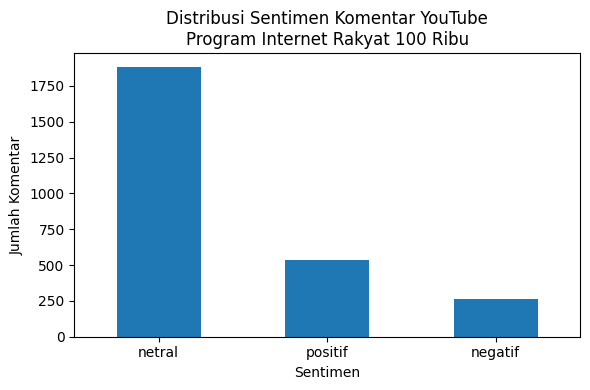

In [40]:
# barchart
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset berlabel
df = pd.read_csv("dataset_dengan_label.csv")

# Hitung distribusi sentimen
sentiment_counts = df['pseudo_label'].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar')

plt.title("Distribusi Sentimen Komentar YouTube\nProgram Internet Rakyat 100 Ribu")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Komentar")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

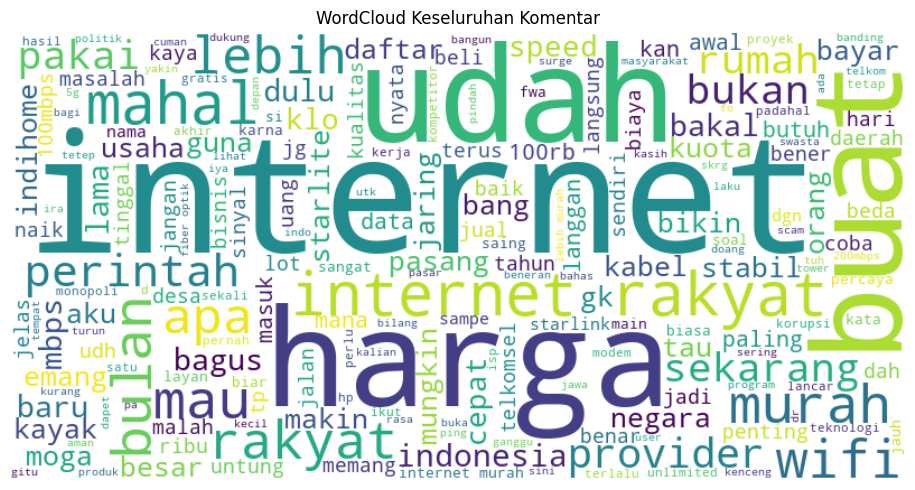

In [43]:
from wordcloud import WordCloud

# Gabungkan semua teks
all_text = " ".join(df['text_stemming'].dropna())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Keseluruhan Komentar")
plt.tight_layout()
plt.show()